### This is the first experiment where we will take a 1000 word essay on a topic AI generated and translate to 5 language and create embedding and comapre the cosine similarity between the embeddings and plot the ebedding vector graph of each language to see how and where it deviates...

In [3]:
from groq import Groq
import numpy as np
import os

In [6]:
API_KEY = os.getenv("API_KEY")

In [9]:

client = Groq(api_key=API_KEY)

def query_groq(text: str) -> str:
    response = client.chat.completions.create(
        model="meta-llama/llama-4-scout-17b-16e-instruct",
        messages=[
            {
                "role": "user",
                "content": text
            }
        ],
        temperature=1,
        top_p=1,
        stream=False,
        stop=None,
    )
    return response.choices[0].message.content

In [10]:
prompt = "Write a 1000 word essay on the history of AI"
output = query_groq(prompt)
print(output)

**The Evolution of Artificial Intelligence: A Historical Perspective**

Artificial Intelligence (AI) has become an integral part of our lives, transforming the way we live, work, and interact with technology. From its humble beginnings to the current state of intelligent machines, AI has undergone significant developments over the years. This essay provides a comprehensive overview of the history of AI, tracing its roots back to the early 20th century and exploring its major milestones, achievements, and challenges.

**The Early Years: 1950s-1960s**

The concept of AI was first introduced in the 1950s by computer scientists who were fascinated by the potential of machines to think and learn. The term "Artificial Intelligence" was coined in 1956 by John McCarthy, a computer scientist and cognitive scientist, who organized the first AI conference at Dartmouth College. The early AI researchers were influenced by the work of Alan Turing, a British mathematician and computer scientist, who 

In [11]:
def translator(text: str,system_message:str) -> str:
    response = client.chat.completions.create(
        model="meta-llama/llama-4-scout-17b-16e-instruct",
        messages=[
            {
                "role": "system",
                "content": system_message
            },
            {
                "role": "user",
                "content": text
            }
        ],
        temperature=1,
        top_p=1,
        stream=False,
        stop=None,
    )
    return response.choices[0].message.content

In [16]:
### System message of five languages 

System_messages = {"odia": """You are a professional translator fluent in English and Odia. Your job is to accurately translate the given English text into natural, grammatically correct, and culturally appropriate Odia. Do not explain or comment—just provide the Odia translation of the input.""",

"hindi" :"""You are a native-level Hindi translator. Translate the given English text into fluent, context-aware, and idiomatic Hindi. Do not include any explanations—only return the Hindi translation of the input.
""",

"spanish":"""You are an expert English-to-Spanish translator. Translate the input text into fluent, natural Spanish suitable for native speakers. Preserve meaning, tone, and context. Output only the Spanish translation without any explanation.
""",

"french": """You are a professional English-to-French translator. Translate the provided English text into formal, precise, and native-sounding French. Do not return any explanation or notes—only return the French translation.
""",

"telgu": """You are a skilled translator fluent in Telugu and English. Translate the input English text into clear, natural, and accurate Telugu. Respond with only the Telugu translation—no explanations or additional information.
"""}

In [17]:
translated_output = {}
translated_output.update({"English":output})
languages = ["odia","hindi","spanish","french","telgu"]
print(translated_output)

{'English': '**The Evolution of Artificial Intelligence: A Historical Perspective**\n\nArtificial Intelligence (AI) has become an integral part of our lives, transforming the way we live, work, and interact with technology. From its humble beginnings to the current state of intelligent machines, AI has undergone significant developments over the years. This essay provides a comprehensive overview of the history of AI, tracing its roots back to the early 20th century and exploring its major milestones, achievements, and challenges.\n\n**The Early Years: 1950s-1960s**\n\nThe concept of AI was first introduced in the 1950s by computer scientists who were fascinated by the potential of machines to think and learn. The term "Artificial Intelligence" was coined in 1956 by John McCarthy, a computer scientist and cognitive scientist, who organized the first AI conference at Dartmouth College. The early AI researchers were influenced by the work of Alan Turing, a British mathematician and compu

In [18]:
for i in languages:
    system_message = System_messages.get(i,"")
    result = translator(output,system_message)
    translated_output.update({i:result})

print(translated_output)

{'English': '**The Evolution of Artificial Intelligence: A Historical Perspective**\n\nArtificial Intelligence (AI) has become an integral part of our lives, transforming the way we live, work, and interact with technology. From its humble beginnings to the current state of intelligent machines, AI has undergone significant developments over the years. This essay provides a comprehensive overview of the history of AI, tracing its roots back to the early 20th century and exploring its major milestones, achievements, and challenges.\n\n**The Early Years: 1950s-1960s**\n\nThe concept of AI was first introduced in the 1950s by computer scientists who were fascinated by the potential of machines to think and learn. The term "Artificial Intelligence" was coined in 1956 by John McCarthy, a computer scientist and cognitive scientist, who organized the first AI conference at Dartmouth College. The early AI researchers were influenced by the work of Alan Turing, a British mathematician and compu

In [20]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 3.8 MB/s eta 0:00:000:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.8 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 3.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 751.2/751.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.7 MB/s eta 0:00:00

In [21]:
from sentence_transformers import SentenceTransformer

model_cache = {}

def get_embedding(text: str, model_name: str):
    if model_name not in model_cache:
        model_cache[model_name] = SentenceTransformer(model_name)
    model = model_cache[model_name]
    embedding = model.encode(text)
    return embedding


/home/sourav/embedding-crosslinguality-study/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
embeddings = {}
for i in translated_output:
    text = translated_output.get(i,"")
    result = get_embedding(text,"paraphrase-multilingual-MiniLM-L12-v2")
    embeddings[f"{i}_embedding"] = result

In [43]:
print(embeddings)

{'English_embedding': array([-2.17835695e-01, -1.61542088e-01, -2.11671256e-02, -2.42223032e-02,
       -1.25029877e-01,  3.19386423e-01,  7.84794539e-02, -1.85736060e-01,
        1.69881374e-01,  1.70334190e-01,  2.63733119e-01,  1.49492681e-01,
        5.59080206e-03,  3.01752687e-02, -1.27717465e-01,  1.63920045e-01,
       -4.77862567e-01, -8.51070881e-02, -2.12851956e-01, -7.19264746e-02,
       -1.63459614e-01, -2.54999157e-02,  5.79551682e-02, -4.73247804e-02,
        1.11927271e-01,  1.20884247e-01,  1.48319706e-01, -6.10847771e-02,
       -1.61638230e-01, -1.78833708e-01,  1.76618889e-01, -1.54439388e-02,
        4.82850790e-01,  1.89540952e-01, -2.89837182e-01,  9.29616541e-02,
       -1.76128969e-02,  8.87068361e-02,  8.09644312e-02, -1.80231884e-01,
       -8.80987793e-02, -1.11582689e-01,  2.05673456e-01, -1.45055115e-01,
        1.51317775e-01,  2.37271175e-01,  8.65386277e-02, -1.79294631e-01,
       -1.41925171e-01, -2.49115095e-01, -1.23500168e-01, -1.15272857e-01,
   

In [44]:
def cosine_similarity(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [45]:
languages = [key.replace("_embedding", "") for key in embeddings.keys()]

similarities = {}

for lang1 in languages:
    vec1 = np.array(embeddings[f"{lang1}_embedding"])
    similarities[lang1] = {}
    for lang2 in languages:
        vec2 = np.array(embeddings[f"{lang2}_embedding"])
        sim = cosine_similarity(vec1, vec2)
        similarities[lang1][lang2] = sim

In [46]:
print(similarities)

{'English': {'English': np.float32(1.0000001), 'odia': np.float32(0.48632056), 'hindi': np.float32(0.9421015), 'spanish': np.float32(0.9406199), 'french': np.float32(0.9457), 'telgu': np.float32(0.7083678)}, 'odia': {'English': np.float32(0.48632056), 'odia': np.float32(0.99999994), 'hindi': np.float32(0.5361673), 'spanish': np.float32(0.55920476), 'french': np.float32(0.49301535), 'telgu': np.float32(0.85558957)}, 'hindi': {'English': np.float32(0.9421015), 'odia': np.float32(0.5361673), 'hindi': np.float32(1.0), 'spanish': np.float32(0.9621067), 'french': np.float32(0.9624517), 'telgu': np.float32(0.7609171)}, 'spanish': {'English': np.float32(0.9406199), 'odia': np.float32(0.55920476), 'hindi': np.float32(0.9621067), 'spanish': np.float32(1.0), 'french': np.float32(0.976967), 'telgu': np.float32(0.7615458)}, 'french': {'English': np.float32(0.9457), 'odia': np.float32(0.49301535), 'hindi': np.float32(0.9624517), 'spanish': np.float32(0.976967), 'french': np.float32(1.0), 'telgu': np

In [30]:
!pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 2.5 MB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 4.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.1 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib] 5/6 [matplotlib]ourpy]


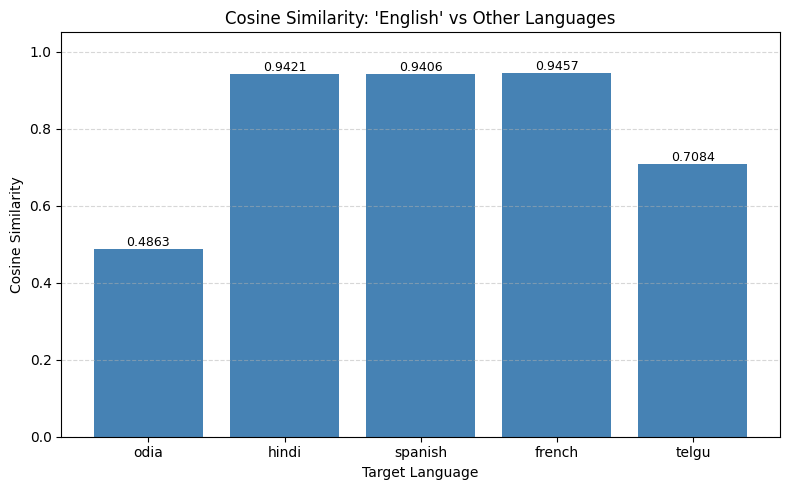

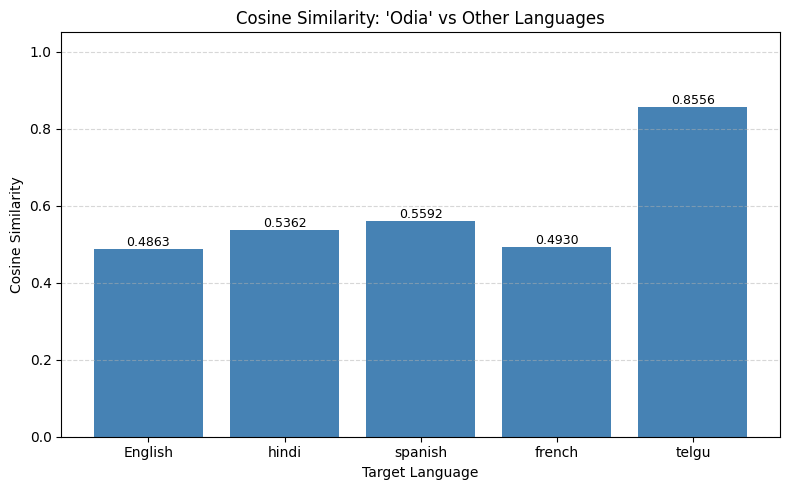

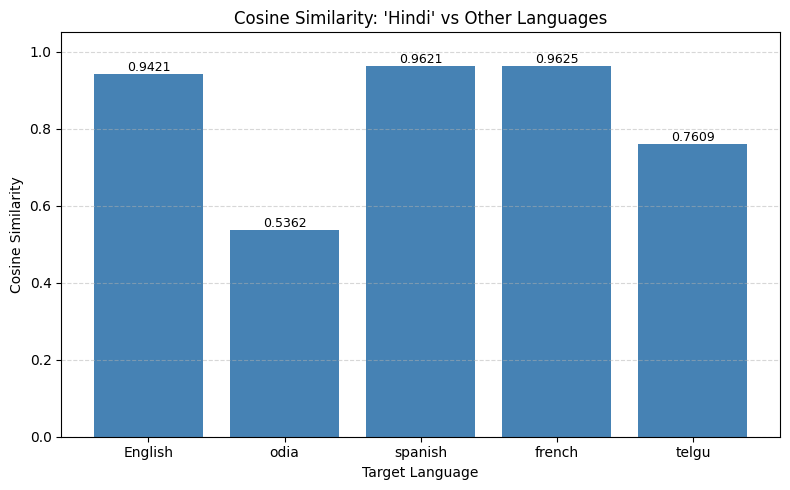

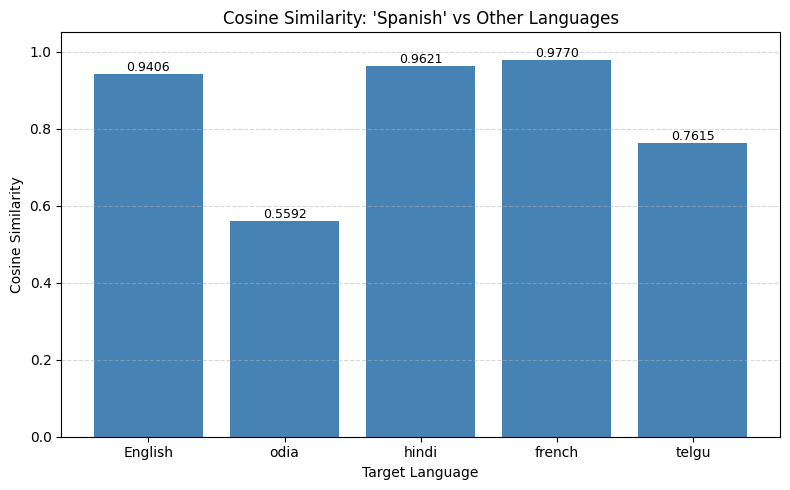

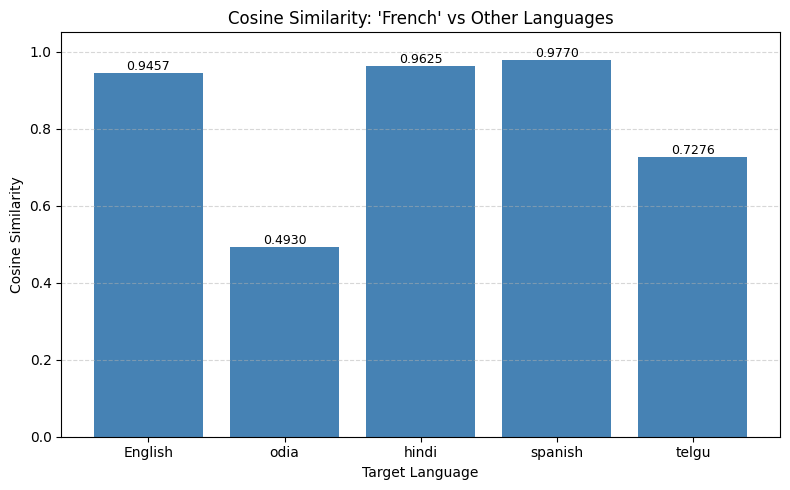

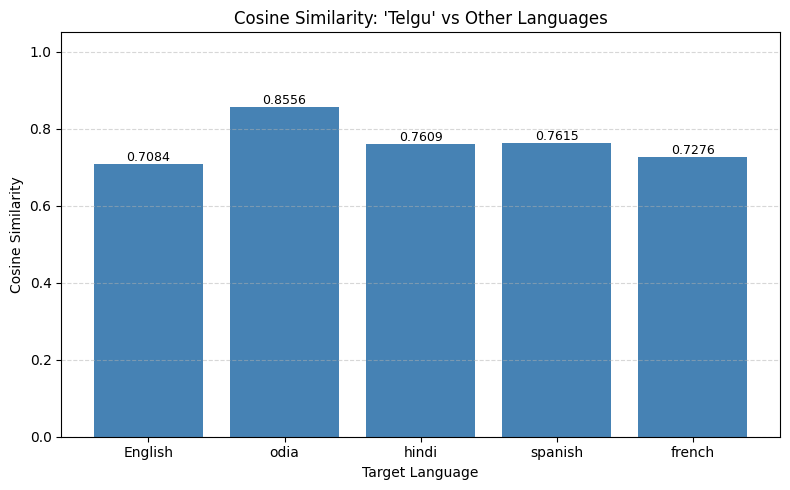

In [47]:
import matplotlib.pyplot as plt

for base_lang in similarities:
    other_langs = [lang for lang in similarities[base_lang] if lang != base_lang]
    scores = [float(similarities[base_lang][lang]) for lang in other_langs]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(other_langs, scores, color='steelblue')
    for bar, score in zip(bars, scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{score:.4f}",
                 ha='center', va='bottom', fontsize=9)

    plt.title(f"Cosine Similarity: '{base_lang.capitalize()}' vs Other Languages")
    plt.ylabel("Cosine Similarity")
    plt.xlabel("Target Language")
    plt.ylim(min(0, min(scores) - 0.1), 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


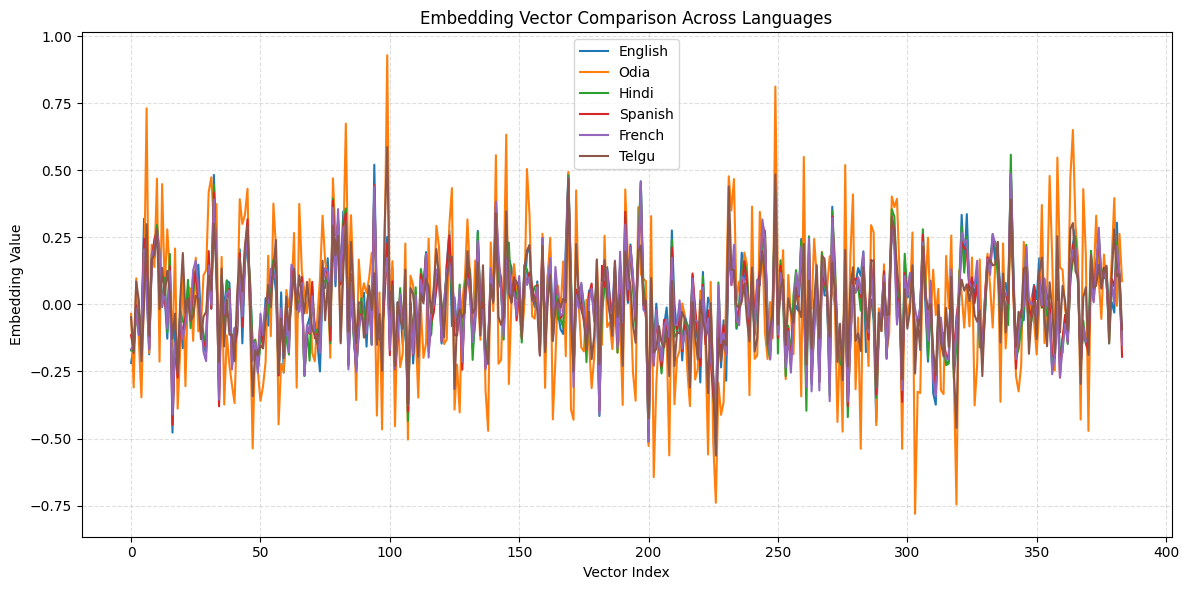

In [48]:
plt.figure(figsize=(12, 6))

for lang, vec in embeddings.items():
    label = lang.replace("_embedding", "").capitalize()
    plt.plot(np.arange(len(vec)), vec, label=label)

plt.title("Embedding Vector Comparison Across Languages")
plt.xlabel("Vector Index")
plt.ylabel("Embedding Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [34]:
!pip install scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


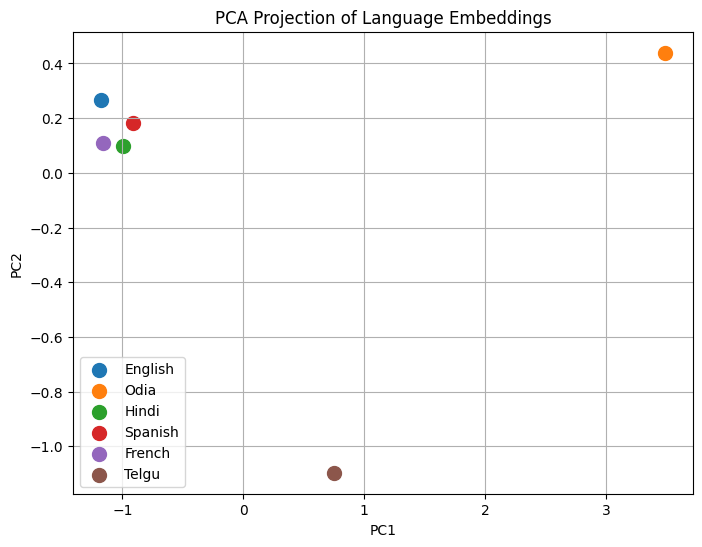

In [49]:
from sklearn.decomposition import PCA

vectors = [vec for vec in embeddings.values()]
labels = [key.replace("_embedding", "").capitalize() for key in embeddings.keys()]

pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, label in enumerate(labels):
    plt.scatter(reduced[i,0], reduced[i,1], label=label, s=100)
plt.title("PCA Projection of Language Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

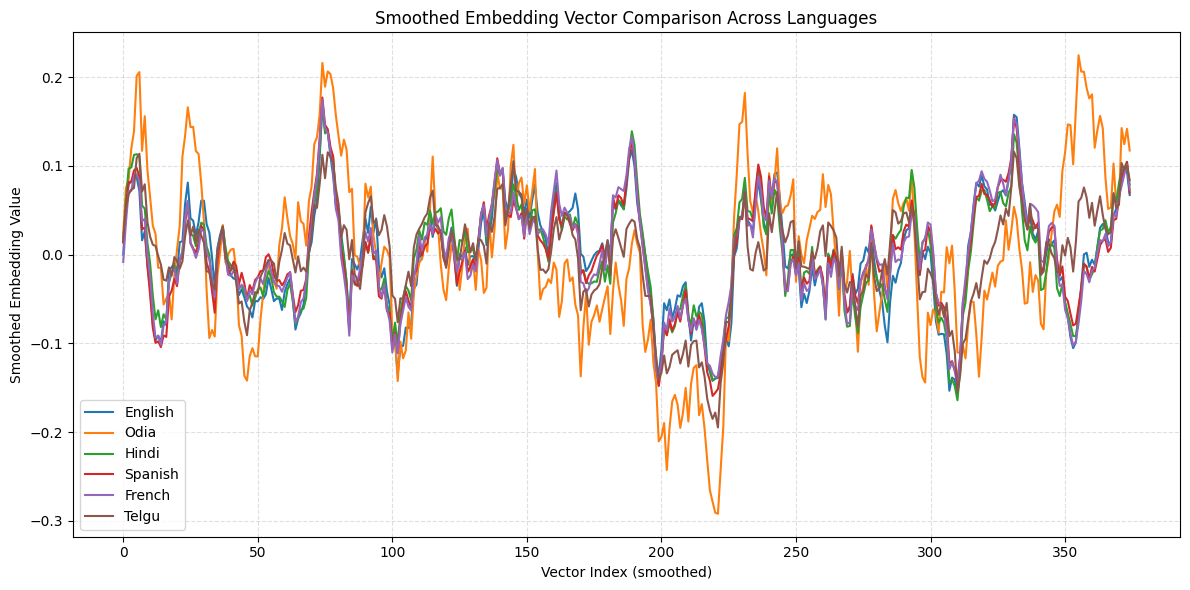

In [50]:

def moving_average(x, w=5):
    return np.convolve(x, np.ones(w), 'valid') / w

plt.figure(figsize=(12, 6))

for lang, vec in embeddings.items():
    label = lang.replace("_embedding", "").capitalize()
    smoothed_vec = moving_average(vec, w=10) 
    plt.plot(np.arange(len(smoothed_vec)), smoothed_vec, label=label)

plt.title("Smoothed Embedding Vector Comparison Across Languages")
plt.xlabel("Vector Index (smoothed)")
plt.ylabel("Smoothed Embedding Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [38]:
!pip install seaborn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.8 MB/s eta 0:00:003.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [seaborn]━━━ 3/4 [seaborn]


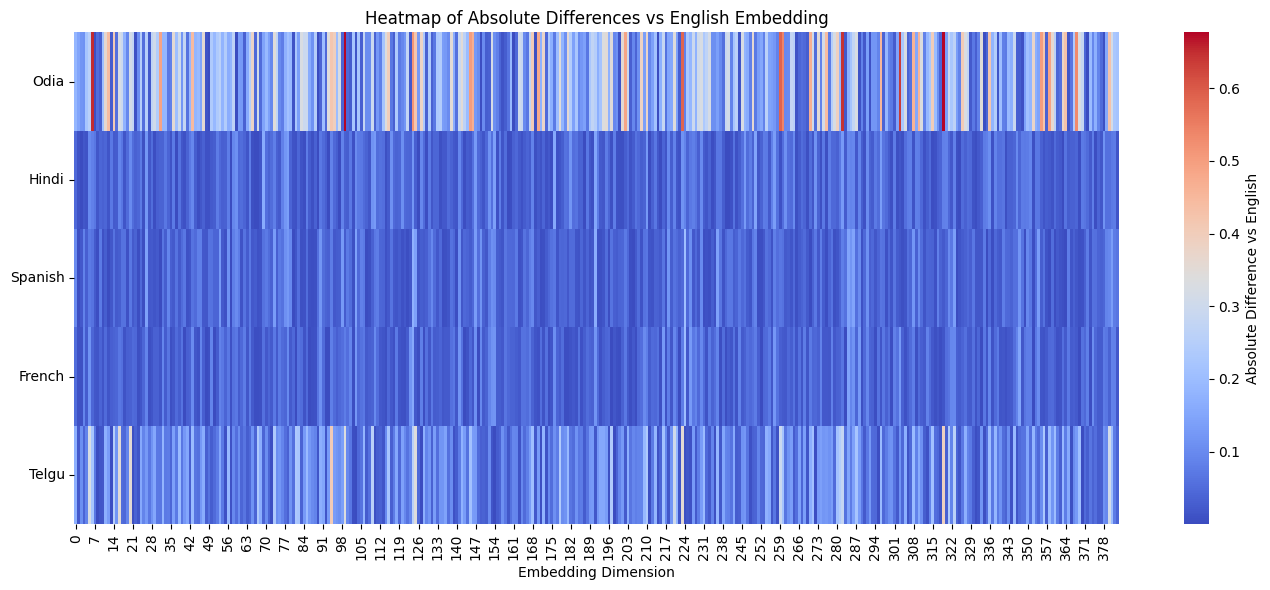

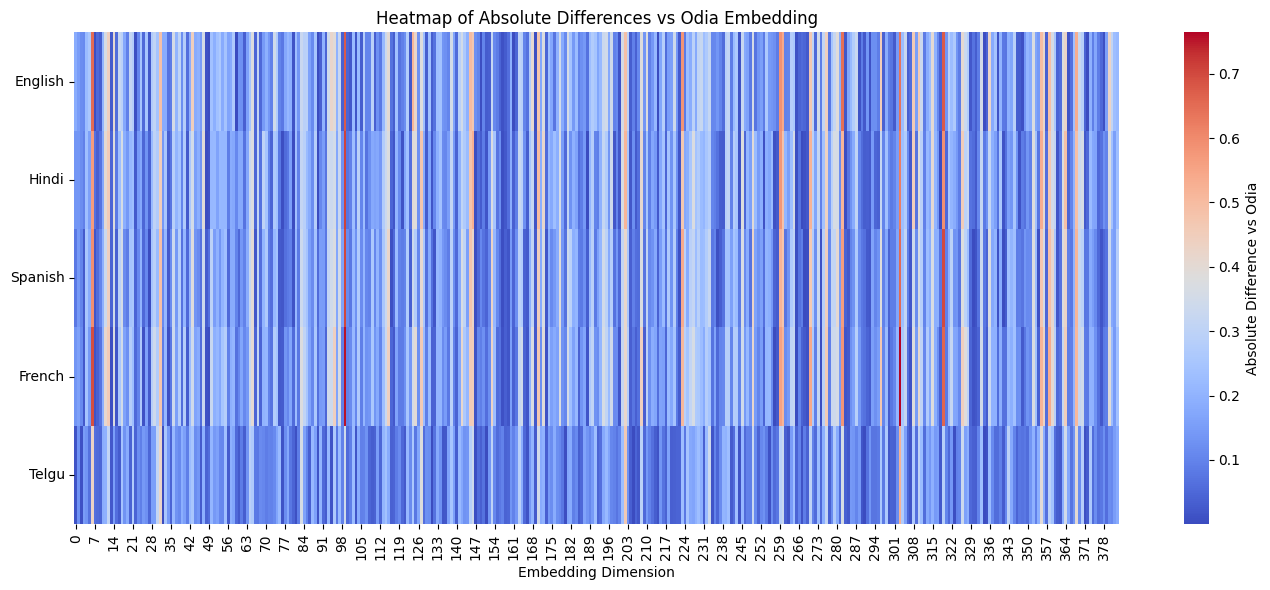

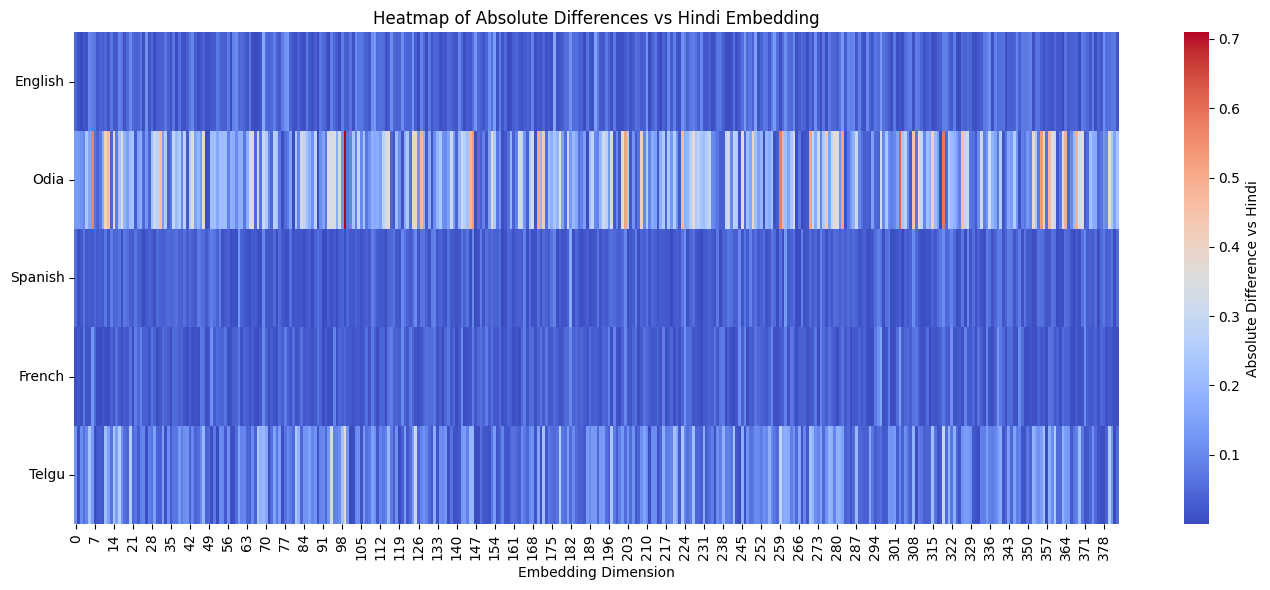

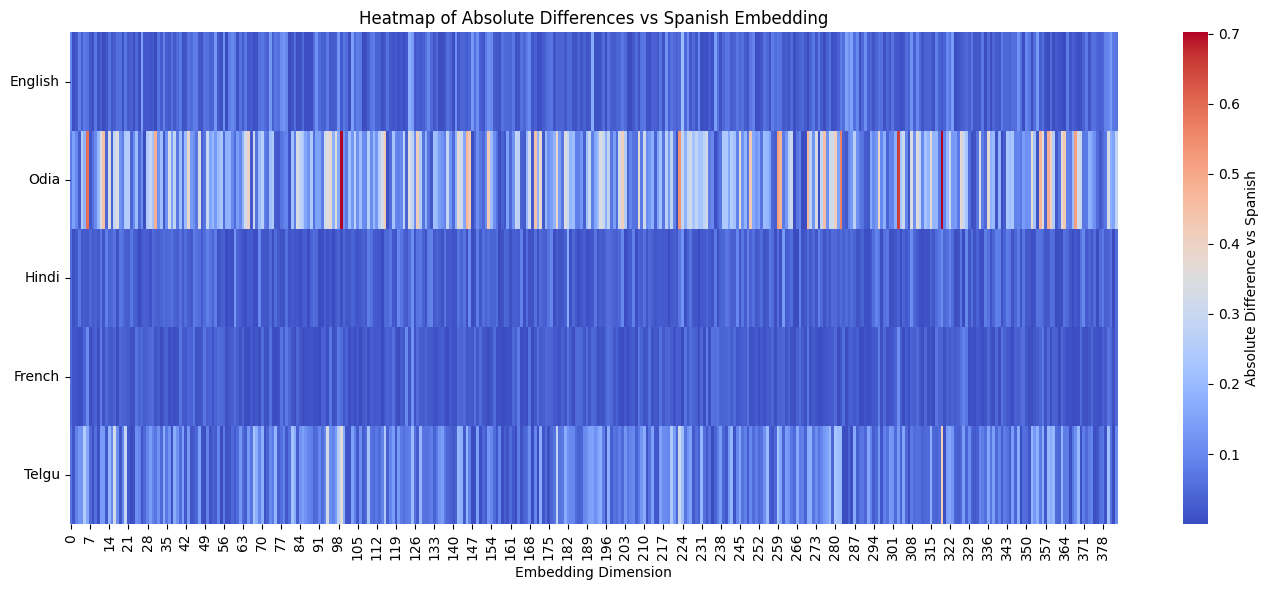

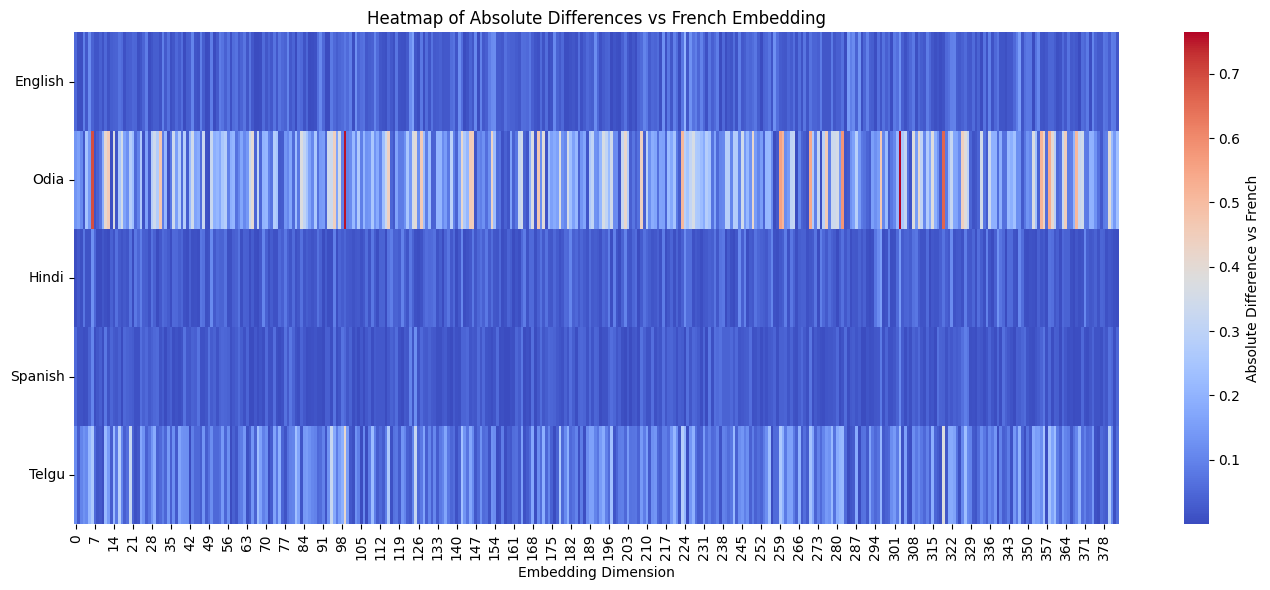

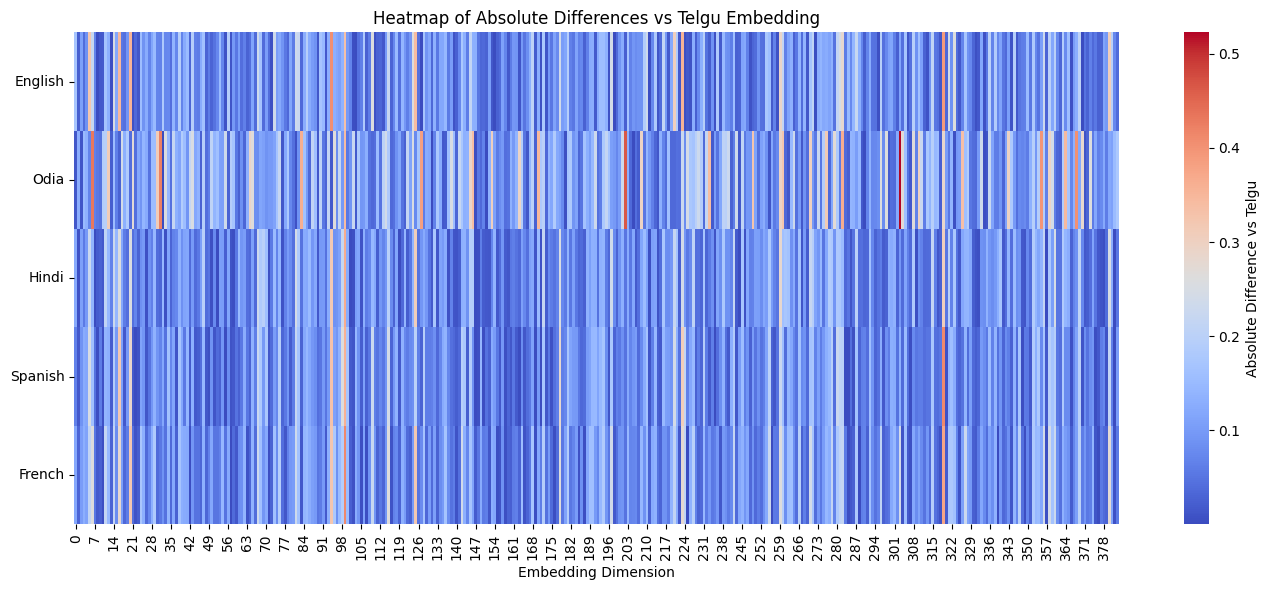

In [51]:
import seaborn as sns

for base_lang in embeddings.keys():
    base_vec = embeddings[base_lang]
    
    diff_dict = {}
    for lang, vec in embeddings.items():
        if lang != base_lang:
            diff_dict[lang.replace("_embedding", "").capitalize()] = np.abs(vec - base_vec)
    
    diff_matrix = np.array(list(diff_dict.values()))
    
    plt.figure(figsize=(14, 6))
    sns.heatmap(diff_matrix, cmap="coolwarm", cbar_kws={'label': f'Absolute Difference vs {base_lang.replace("_embedding", "").capitalize()}'})
    plt.yticks(np.arange(len(diff_dict)) + 0.5, list(diff_dict.keys()), rotation=0)
    plt.xlabel("Embedding Dimension")
    plt.title(f"Heatmap of Absolute Differences vs {base_lang.replace('_embedding', '').capitalize()} Embedding")
    plt.tight_layout()
    plt.show()
